In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import xgboost as xgb

In [18]:
df4 = pd.read_excel("data_compile_agro_ERA5 data.xlsx")

In [19]:
df = pd.read_excel("data_compile_agro_sentinel_1.xlsx")
df2 = pd.read_excel("data_compile_agro_CHIRP_Anomali.xlsx")
df3 = pd.read_excel("data_compile_agro_CHIRP.xlsx")

In [20]:
var1 = df.loc[:, 'VH_14':'VH_0']
var2 = df.loc[:, 'VH_46':'VH_32']
var3 = df2.loc[:, 'PREC_5':'PREC_0']
var4 = df3.loc[:, 'PREC_5':'PREC_0']

In [21]:
var5 = df4[["ERA5_tp_mean_14","ERA5_tp_mean_13","ERA5_tp_mean_12","ERA5_tp_mean_11","ERA5_tp_mean_10","ERA5_tp_mean_09","ERA5_tp_mean_08","ERA5_tp_mean_07","ERA5_tp_mean_06","ERA5_tp_mean_05","ERA5_tp_mean_04","ERA5_tp_mean_03","ERA5_tp_mean_02","ERA5_tp_mean_01","ERA5_tp_mean_00",
"ERA5_tp_max_14", "ERA5_tp_max_13", "ERA5_tp_max_12", "ERA5_tp_max_11", "ERA5_tp_max_10", "ERA5_tp_max_09", "ERA5_tp_max_08", "ERA5_tp_max_07", "ERA5_tp_max_06", "ERA5_tp_max_05", "ERA5_tp_max_04", "ERA5_tp_max_03", "ERA5_tp_max_02", "ERA5_tp_max_01", "ERA5_tp_max_00",
"ERA5_tp_min_14", "ERA5_tp_min_13", "ERA5_tp_min_12", "ERA5_tp_min_11", "ERA5_tp_min_10", "ERA5_tp_min_09", "ERA5_tp_min_08", "ERA5_tp_min_07", "ERA5_tp_min_06", "ERA5_tp_min_05", "ERA5_tp_min_04", "ERA5_tp_min_03", "ERA5_tp_min_02", "ERA5_tp_min_01", "ERA5_tp_min_00",
"ERA5_t2m_mean_14", "ERA5_t2m_mean_13", "ERA5_t2m_mean_12", "ERA5_t2m_mean_11", "ERA5_t2m_mean_10", "ERA5_t2m_mean_09", "ERA5_t2m_mean_08", "ERA5_t2m_mean_07", "ERA5_t2m_mean_06", "ERA5_t2m_mean_05", "ERA5_t2m_mean_04", "ERA5_t2m_mean_03", "ERA5_t2m_mean_02", "ERA5_t2m_mean_01", "ERA5_t2m_mean_00",
"ERA5_t2m_max_14", "ERA5_t2m_max_13", "ERA5_t2m_max_12", "ERA5_t2m_max_11", "ERA5_t2m_max_10", "ERA5_t2m_max_09", "ERA5_t2m_max_08", "ERA5_t2m_max_07", "ERA5_t2m_max_06", "ERA5_t2m_max_05", "ERA5_t2m_max_04", "ERA5_t2m_max_03", "ERA5_t2m_max_02", "ERA5_t2m_max_01", "ERA5_t2m_max_00",
"ERA5_t2m_min_14", "ERA5_t2m_min_13", "ERA5_t2m_min_12", "ERA5_t2m_min_11", "ERA5_t2m_min_10", "ERA5_t2m_min_09", "ERA5_t2m_min_08", "ERA5_t2m_min_07", "ERA5_t2m_min_06", "ERA5_t2m_min_05", "ERA5_t2m_min_04", "ERA5_t2m_min_03", "ERA5_t2m_min_02", "ERA5_t2m_min_01", "ERA5_t2m_min_00",
"ERA5_d2m_mean_14", "ERA5_d2m_mean_13", "ERA5_d2m_mean_12", "ERA5_d2m_mean_11", "ERA5_d2m_mean_10", "ERA5_d2m_mean_09", "ERA5_d2m_mean_08", "ERA5_d2m_mean_07", "ERA5_d2m_mean_06", "ERA5_d2m_mean_05", "ERA5_d2m_mean_04", "ERA5_d2m_mean_03", "ERA5_d2m_mean_02", "ERA5_d2m_mean_01", "ERA5_d2m_mean_00",
"ERA5_d2m_max_14", "ERA5_d2m_max_13", "ERA5_d2m_max_12", "ERA5_d2m_max_11", "ERA5_d2m_max_10", "ERA5_d2m_max_09", "ERA5_d2m_max_08", "ERA5_d2m_max_07", "ERA5_d2m_max_06", "ERA5_d2m_max_05", "ERA5_d2m_max_04", "ERA5_d2m_max_03", "ERA5_d2m_max_02", "ERA5_d2m_max_01", "ERA5_d2m_max_00",
"ERA5_d2m_min_14", "ERA5_d2m_min_13", "ERA5_d2m_min_12", "ERA5_d2m_min_11", "ERA5_d2m_min_10", "ERA5_d2m_min_09", "ERA5_d2m_min_08", "ERA5_d2m_min_07", "ERA5_d2m_min_06", "ERA5_d2m_min_05", "ERA5_d2m_min_04", "ERA5_d2m_min_03", "ERA5_d2m_min_02", "ERA5_d2m_min_01", "ERA5_d2m_min_00",
"ERA5_crr_mean_14", "ERA5_crr_mean_13", "ERA5_crr_mean_12", "ERA5_crr_mean_11", "ERA5_crr_mean_10", "ERA5_crr_mean_09", "ERA5_crr_mean_08", "ERA5_crr_mean_07", "ERA5_crr_mean_06", "ERA5_crr_mean_05", "ERA5_crr_mean_04", "ERA5_crr_mean_03", "ERA5_crr_mean_02", "ERA5_crr_mean_01", "ERA5_crr_mean_00",
"ERA5_crr_max_14", "ERA5_crr_max_13", "ERA5_crr_max_12", "ERA5_crr_max_11", "ERA5_crr_max_10", "ERA5_crr_max_09", "ERA5_crr_max_08", "ERA5_crr_max_07", "ERA5_crr_max_06", "ERA5_crr_max_05", "ERA5_crr_max_04", "ERA5_crr_max_03", "ERA5_crr_max_02", "ERA5_crr_max_01", "ERA5_crr_max_00",
"ERA5_crr_min_14", "ERA5_crr_min_13", "ERA5_crr_min_12", "ERA5_crr_min_11", "ERA5_crr_min_10", "ERA5_crr_min_09", "ERA5_crr_min_08", "ERA5_crr_min_07", "ERA5_crr_min_06", "ERA5_crr_min_05", "ERA5_crr_min_04", "ERA5_crr_min_03", "ERA5_crr_min_02", "ERA5_crr_min_01", "ERA5_crr_min_00",
"ERA5_pev_mean_14", "ERA5_pev_mean_13", "ERA5_pev_mean_12", "ERA5_pev_mean_11", "ERA5_pev_mean_10", "ERA5_pev_mean_09", "ERA5_pev_mean_08", "ERA5_pev_mean_07", "ERA5_pev_mean_06", "ERA5_pev_mean_05", "ERA5_pev_mean_04", "ERA5_pev_mean_03", "ERA5_pev_mean_02", "ERA5_pev_mean_01", "ERA5_pev_mean_00",
"ERA5_pev_max_14", "ERA5_pev_max_13", "ERA5_pev_max_12", "ERA5_pev_max_11", "ERA5_pev_max_10", "ERA5_pev_max_09", "ERA5_pev_max_08", "ERA5_pev_max_07", "ERA5_pev_max_06", "ERA5_pev_max_05", "ERA5_pev_max_04", "ERA5_pev_max_03", "ERA5_pev_max_02", "ERA5_pev_max_01", "ERA5_pev_max_00",
"ERA5_pev_min_14", "ERA5_pev_min_13", "ERA5_pev_min_12", "ERA5_pev_min_11", "ERA5_pev_min_10", "ERA5_pev_min_09", "ERA5_pev_min_08", "ERA5_pev_min_07", "ERA5_pev_min_06", "ERA5_pev_min_05", "ERA5_pev_min_04", "ERA5_pev_min_03", "ERA5_pev_min_02", "ERA5_pev_min_01", "ERA5_pev_min_00",
"ERA5_e_mean_14", "ERA5_e_mean_13", "ERA5_e_mean_12", "ERA5_e_mean_11", "ERA5_e_mean_10", "ERA5_e_mean_09", "ERA5_e_mean_08", "ERA5_e_mean_07", "ERA5_e_mean_06", "ERA5_e_mean_05", "ERA5_e_mean_04", "ERA5_e_mean_03", "ERA5_e_mean_02", "ERA5_e_mean_01", "ERA5_e_mean_00",
"ERA5_e_max_14", "ERA5_e_max_13", "ERA5_e_max_12", "ERA5_e_max_11", "ERA5_e_max_10", "ERA5_e_max_09", "ERA5_e_max_08", "ERA5_e_max_07", "ERA5_e_max_06", "ERA5_e_max_05", "ERA5_e_max_04", "ERA5_e_max_03", "ERA5_e_max_02", "ERA5_e_max_01", "ERA5_e_max_00",
"ERA5_e_min_14", "ERA5_e_min_13", "ERA5_e_min_12", "ERA5_e_min_11", "ERA5_e_min_10", "ERA5_e_min_09", "ERA5_e_min_08", "ERA5_e_min_07", "ERA5_e_min_06", "ERA5_e_min_05", "ERA5_e_min_04", "ERA5_e_min_03", "ERA5_e_min_02", "ERA5_e_min_01", "ERA5_e_min_00",
"ERA5_stl1_mean_14", "ERA5_stl1_mean_13", "ERA5_stl1_mean_12", "ERA5_stl1_mean_11", "ERA5_stl1_mean_10", "ERA5_stl1_mean_09", "ERA5_stl1_mean_08", "ERA5_stl1_mean_07", "ERA5_stl1_mean_06", "ERA5_stl1_mean_05", "ERA5_stl1_mean_04", "ERA5_stl1_mean_03", "ERA5_stl1_mean_02", "ERA5_stl1_mean_01", "ERA5_stl1_mean_00",
"ERA5_stl1_max_14", "ERA5_stl1_max_13", "ERA5_stl1_max_12", "ERA5_stl1_max_11", "ERA5_stl1_max_10", "ERA5_stl1_max_09", "ERA5_stl1_max_08", "ERA5_stl1_max_07", "ERA5_stl1_max_06", "ERA5_stl1_max_05", "ERA5_stl1_max_04", "ERA5_stl1_max_03", "ERA5_stl1_max_02", "ERA5_stl1_max_01", "ERA5_stl1_max_00",
"ERA5_stl1_min_14", "ERA5_stl1_min_13", "ERA5_stl1_min_12", "ERA5_stl1_min_11", "ERA5_stl1_min_10", "ERA5_stl1_min_09", "ERA5_stl1_min_08", "ERA5_stl1_min_07", "ERA5_stl1_min_06", "ERA5_stl1_min_05", "ERA5_stl1_min_04", "ERA5_stl1_min_03", "ERA5_stl1_min_02", "ERA5_stl1_min_01", "ERA5_stl1_min_00",
"ERA5_swvl1_mean_14", "ERA5_swvl1_mean_13", "ERA5_swvl1_mean_12", "ERA5_swvl1_mean_11", "ERA5_swvl1_mean_10", "ERA5_swvl1_mean_09", "ERA5_swvl1_mean_08", "ERA5_swvl1_mean_07", "ERA5_swvl1_mean_06", "ERA5_swvl1_mean_05", "ERA5_swvl1_mean_04", "ERA5_swvl1_mean_03", "ERA5_swvl1_mean_02", "ERA5_swvl1_mean_01", "ERA5_swvl1_mean_00",
"ERA5_swvl1_max_14", "ERA5_swvl1_max_13", "ERA5_swvl1_max_12", "ERA5_swvl1_max_11", "ERA5_swvl1_max_10", "ERA5_swvl1_max_09", "ERA5_swvl1_max_08", "ERA5_swvl1_max_07", "ERA5_swvl1_max_06", "ERA5_swvl1_max_05", "ERA5_swvl1_max_04", "ERA5_swvl1_max_03", "ERA5_swvl1_max_02", "ERA5_swvl1_max_01", "ERA5_swvl1_max_00",
"ERA5_swvl1_min_14", "ERA5_swvl1_min_13", "ERA5_swvl1_min_12", "ERA5_swvl1_min_11", "ERA5_swvl1_min_10", "ERA5_swvl1_min_09", "ERA5_swvl1_min_08", "ERA5_swvl1_min_07", "ERA5_swvl1_min_06", "ERA5_swvl1_min_05", "ERA5_swvl1_min_04", "ERA5_swvl1_min_03", "ERA5_swvl1_min_02", "ERA5_swvl1_min_01", "ERA5_swvl1_min_00",
]]


In [22]:
prec_columns = ['PREC_5', 'PREC_4', 'PREC_3', 'PREC_2', 'PREC_1', 'PREC_0']

# Beri nama kolom untuk mencegah duplikasi
var3.columns = (
    [f'PREC_df2_{col}' for col in prec_columns]
)

# Beri nama kolom untuk mencegah duplikasi
var4.columns = (
    [f'PREC_df2_{col}' for col in prec_columns]
)

In [23]:
# Gabungkan kolom menjadi satu DataFrame
combined_df = pd.concat([
    var1,
    var2,
    var3,
    var4,
    var5
], axis=1)

In [36]:
combined_df.columns

Index(['VH_14', 'VH_13', 'VH_12', 'VH_11', 'VH_10', 'VH_9', 'VH_8', 'VH_7',
       'VH_6', 'VH_5',
       ...
       'ERA5_swvl1_min_09', 'ERA5_swvl1_min_08', 'ERA5_swvl1_min_07',
       'ERA5_swvl1_min_06', 'ERA5_swvl1_min_05', 'ERA5_swvl1_min_04',
       'ERA5_swvl1_min_03', 'ERA5_swvl1_min_02', 'ERA5_swvl1_min_01',
       'ERA5_swvl1_min_00'],
      dtype='object', length=402)

In [24]:
combined_df

,VH_14,VH_13,VH_12,VH_11,VH_10,VH_9,VH_8,VH_7,VH_6,VH_5,...,ERA5_swvl1_min_09,ERA5_swvl1_min_08,ERA5_swvl1_min_07,ERA5_swvl1_min_06,ERA5_swvl1_min_05,ERA5_swvl1_min_04,ERA5_swvl1_min_03,ERA5_swvl1_min_02,ERA5_swvl1_min_01,ERA5_swvl1_min_00
0,154,154,153,151,150,151,146,143,137,133,...,0.383598,0.458427,0.491491,0.489822,0.484914,0.480564,0.487643,0.466687,0.478815,0.476534
1,156,158,157,155,153,156,150,146,140,137,...,0.345053,0.421821,0.455950,0.455059,0.452774,0.451469,0.458562,0.439853,0.456593,0.448163
2,158,156,154,153,152,151,149,145,137,133,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
3,156,157,155,154,152,151,152,151,150,149,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
4,173,175,177,178,176,174,171,169,172,175,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,175,173,172,170,169,166,164,163,164,164,...,0.163237,0.173693,0.158000,0.158482,0.224848,0.222909,0.315330,0.369777,0.357452,0.350523
5395,175,176,174,170,168,165,163,159,154,150,...,0.254541,0.270404,0.238914,0.267420,0.339883,0.381345,0.433027,0.466872,0.448235,0.445642
5396,168,169,169,170,171,172,172,172,172,172,...,0.258652,0.267900,0.266681,0.287482,0.299199,0.345911,0.396775,0.442279,0.404375,0.397254
5397,172,175,176,176,176,175,174,172,171,170,...,0.258652,0.267900,0.266681,0.287482,0.299199,0.345911,0.396775,0.442279,0.404375,0.397254


In [54]:
df

,Unnamed: 0,idsubsegmen_repair,obs,tahun,bulan,kdprov,idsubfinal,idkab,idkec,idsegmen,...,VH_9,VH_8,VH_7,VH_6,VH_5,VH_4,VH_3,VH_2,VH_1,VH_0
0,0,320104008A1,6.0,23,9,32,320104008A1239,3201,3201040,320104008,...,151,146,143,137,133,130,125,132,135,129
1,1,320104008A2,6.0,23,9,32,320104008A2239,3201,3201040,320104008,...,156,150,146,140,137,135,134,137,140,141
2,2,320104008C2,6.0,23,9,32,320104008C2239,3201,3201040,320104008,...,151,149,145,137,133,129,127,130,132,133
3,3,320111002B3,6.0,23,9,32,320111002B3239,3201,3201110,320111002,...,151,152,151,150,149,148,147,148,149,149
4,4,320126007A2,6.0,23,9,32,320126007A2239,3201,3201260,320126007,...,174,171,169,172,175,176,174,173,172,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,5394,327404008B2,8.0,22,12,32,327404008B22212,3274,3274040,327404008,...,166,164,163,164,164,166,167,166,165,164
5395,5395,327503005A2,1.0,22,12,32,327503005A22212,3275,3275030,327503005,...,165,163,159,154,150,147,145,144,145,146
5396,5396,327503108C3,12.0,22,12,32,327503108C32212,3275,3275031,327503108,...,172,172,172,172,172,172,172,172,172,171
5397,5397,327604105A2,7.3,22,12,32,327604105A22212,3276,3276041,327604105,...,175,174,172,171,170,169,168,166,165,164


In [25]:
X = combined_df.values
y = df['is_puso'].values

In [26]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,154.0,154.0,153.0,151.0,150.0,151.0,146.0,143.0,137.0,133.0,...,0.383598,0.458427,0.491491,0.489822,0.484914,0.480564,0.487643,0.466687,0.478815,0.476534
1,156.0,158.0,157.0,155.0,153.0,156.0,150.0,146.0,140.0,137.0,...,0.345053,0.421821,0.455950,0.455059,0.452774,0.451469,0.458562,0.439853,0.456593,0.448163
2,158.0,156.0,154.0,153.0,152.0,151.0,149.0,145.0,137.0,133.0,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
3,156.0,157.0,155.0,154.0,152.0,151.0,152.0,151.0,150.0,149.0,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
4,173.0,175.0,177.0,178.0,176.0,174.0,171.0,169.0,172.0,175.0,...,0.381532,0.454238,0.487228,0.482254,0.480447,0.478765,0.488009,0.458223,0.480693,0.475494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5394,175.0,173.0,172.0,170.0,169.0,166.0,164.0,163.0,164.0,164.0,...,0.163237,0.173693,0.158000,0.158482,0.224848,0.222909,0.315330,0.369777,0.357452,0.350523
5395,175.0,176.0,174.0,170.0,168.0,165.0,163.0,159.0,154.0,150.0,...,0.254541,0.270404,0.238914,0.267420,0.339883,0.381345,0.433027,0.466872,0.448235,0.445642
5396,168.0,169.0,169.0,170.0,171.0,172.0,172.0,172.0,172.0,172.0,...,0.258652,0.267900,0.266681,0.287482,0.299199,0.345911,0.396775,0.442279,0.404375,0.397254
5397,172.0,175.0,176.0,176.0,176.0,175.0,174.0,172.0,171.0,170.0,...,0.258652,0.267900,0.266681,0.287482,0.299199,0.345911,0.396775,0.442279,0.404375,0.397254


In [27]:
from sklearn.model_selection import train_test_split

# Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1234
)

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
metrics = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Inisialisasi dan training model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
    model.fit(X_train_fold, y_train_fold)
    
    # Evaluasi pada data validasi
    y_val_pred = model.predict(X_val_fold)
    precision = precision_score(y_val_fold, y_val_pred, average=None)  # Per kelas
    recall = recall_score(y_val_fold, y_val_pred, average=None)        # Per kelas
    f1_macro = f1_score(y_val_fold, y_val_pred, average='macro')       # F1-macro
    
    metrics.append({
        'precision_class_0': precision[0],
        'precision_class_1': precision[1],
        'recall_class_0': recall[0],
        'recall_class_1': recall[1],
        'f1_macro': f1_macro
    })

# Rata-rata metrik
cv_metrics = pd.DataFrame(metrics).mean()
print("CV Metrics (3-Fold):")
print(cv_metrics)

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:42:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:45:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:48:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CV Metrics (3-Fold):
precision_class_0    0.958602
precision_class_1    0.907152
recall_class_0       0.989394
recall_class_1       0.705595
f1_macro             0.883652
dtype: float64


In [29]:
# Final training
final_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
final_model.fit(X_train, y_train)

# Prediksi pada data test
y_test_pred = final_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Laporan metrik
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print(f"\nPrecision per class: {precision_per_class}")
print(f"Recall per class: {recall_per_class}")
print(f"F1-macro: {f1_macro}")

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [12:51:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[1405   10]
 [  60  145]]

Precision per class: [0.95904437 0.93548387]
Recall per class: [0.99293286 0.70731707]
F1-macro: 0.890625


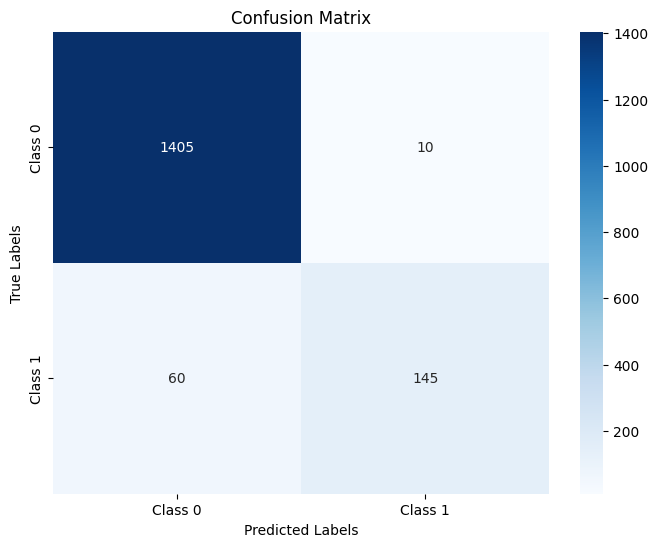


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1415
           1       0.94      0.71      0.81       205

    accuracy                           0.96      1620
   macro avg       0.95      0.85      0.89      1620
weighted avg       0.96      0.96      0.95      1620


Precision per class: [0.95904437 0.93548387]
Recall per class: [0.99293286 0.70731707]
F1-macro: 0.890625


In [30]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Laporan metrik tambahan
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print(f"\nPrecision per class: {precision_per_class}")
print(f"Recall per class: {recall_per_class}")
print(f"F1-macro: {f1_macro}")

In [56]:
# # Feature importance
# feature_importances = final_model.feature_importances_
# importance_df = pd.DataFrame({
#     "Feature": combined_df.columns,
#     "Importance": feature_importances
# }).sort_values(by="Importance", ascending=False).head(10)
# print(f"\n Top 8 Features :\n", importance_df)

In [57]:
### HANYA ERA SAJA
### HANYA ERA SAJA
### HANYA ERA SAJA
### HANYA ERA SAJA

In [58]:
X = var4.values
y = df['is_puso'].values

In [59]:
from sklearn.model_selection import train_test_split

# Train-test split dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1234
)

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)
metrics = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Inisialisasi dan training model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
    model.fit(X_train_fold, y_train_fold)
    
    # Evaluasi pada data validasi
    y_val_pred = model.predict(X_val_fold)
    precision = precision_score(y_val_fold, y_val_pred, average=None)  # Per kelas
    recall = recall_score(y_val_fold, y_val_pred, average=None)        # Per kelas
    f1_macro = f1_score(y_val_fold, y_val_pred, average='macro')       # F1-macro
    
    metrics.append({
        'precision_class_0': precision[0],
        'precision_class_1': precision[1],
        'recall_class_0': recall[0],
        'recall_class_1': recall[1],
        'f1_macro': f1_macro
    })

# Rata-rata metrik
cv_metrics = pd.DataFrame(metrics).mean()
print("CV Metrics (3-Fold):")
print(cv_metrics)

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:33:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:36:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CV Metrics (3-Fold):
precision_class_0    0.929976
precision_class_1    0.679023
recall_class_0       0.965758
recall_class_1       0.498978
f1_macro             0.761298
dtype: float64


In [51]:
# Final training
final_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234, n_jobs=32)
final_model.fit(X_train, y_train)

# Prediksi pada data test
y_test_pred = final_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Laporan metrik
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print(f"\nPrecision per class: {precision_per_class}")
print(f"Recall per class: {recall_per_class}")
print(f"F1-macro: {f1_macro}")

Confusion Matrix:
[[1365   50]
 [ 109   96]]

Precision per class: [0.92605156 0.65753425]
Recall per class: [0.96466431 0.46829268]
F1-macro: 0.745986101126288


/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:28:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


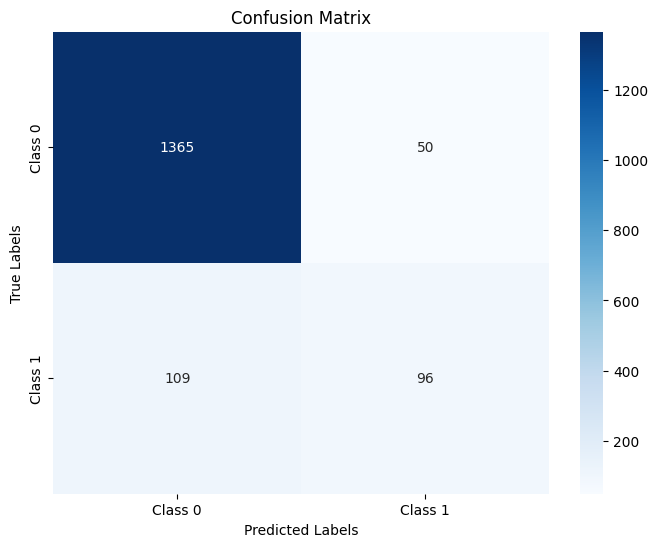


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1415
           1       0.66      0.47      0.55       205

    accuracy                           0.90      1620
   macro avg       0.79      0.72      0.75      1620
weighted avg       0.89      0.90      0.89      1620


Precision per class: [0.92605156 0.65753425]
Recall per class: [0.96466431 0.46829268]
F1-macro: 0.745986101126288


In [52]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Laporan metrik tambahan
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_macro = f1_score(y_test, y_test_pred, average='macro')

print(f"\nPrecision per class: {precision_per_class}")
print(f"Recall per class: {recall_per_class}")
print(f"F1-macro: {f1_macro}")